In [324]:
from cProfile import label
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from math import log
import seaborn as sns
sns.set_context('notebook')


def turn_after_dip_to_df(cpd):
    """
    takes a df and a number takes a dataframe and turns it to loglog and takes the sub df after the minimum y value(by calling the function: after_the_dip)
    """
    cpd = log_maker(cpd)
    x, y = after_the_dip(cpd)
    df = pd.DataFrame({"x": x, "Curve1": y}, columns=['x', 'Curve1'])
    return df


def after_the_dip(cpd, number=1):
    """
    takes a df and gives 2 arrays which are created from the sub df(after y minimum)
    """
    curve_y = list(cpd["Curve1"]*number)
    curve_x = list(cpd["x"]*number)
    min_arr = int(curve_y.index(min(curve_y)))
    curve_y = curve_y[min_arr:]
    curve_x = curve_x[min_arr:]
    return curve_x, curve_y


def slope(cpd, number=1):
    """
    calculates the slope of the graph of df and returns it by rounding to 6 digits
    """
    curve_x, curve_y = after_the_dip(cpd)
    curve_y = list(np.log(curve_y))
    curve_x = list(np.log(curve_x))
    return linregress(curve_x, curve_y).slope

def intercept(cpd,number=1):
    curve_x, curve_y = after_the_dip(cpd)
    curve_y = list(np.log(curve_y))
    curve_x = list(np.log(curve_x))
    return linregress(curve_x, curve_y).intercept

def log_maker(cpd):
    """
        returns the loglog version of the df
    """
    cpd["x"] = [log(x) for x in cpd["x"]]
    cpd["Curve1"] = [log(x) for x in cpd["Curve1"]]
    return cpd


def plot_cpd(cpd_0, cpd_2, cpd_4, cpd_8, cpd_16, x_label, y_label, title):
    plt.plot(cpd_0["x"], cpd_0["Curve1"], color="#c7e9b4", 
               label=f"0 cpd, slope ={str(slope(cpd_0))[:4]}, intercept ={str(intercept(cpd_0))[:4]}", marker="o")
    plt.plot(cpd_2["x"], cpd_2["Curve1"], color="#7fcdbb", 
               label=f"2 cpd, slope ={str(slope(cpd_2))[:4]}, intercept ={str(intercept(cpd_2))[:4]}", marker="o")
    plt.plot(cpd_4["x"], cpd_4["Curve1"], color="#41b6c4",
               label=f"4 cpd, slope ={str(slope(cpd_4))[:4]}, intercept ={str(intercept(cpd_4))[:4]}", marker="o")
    plt.plot(cpd_8["x"], cpd_8["Curve1"], color="#2c7fb8", 
               label=f"8 cpd, slope ={str(slope(cpd_8))[:4]}, intercept ={str(intercept(cpd_8))[:4]}", marker="o")
    plt.plot(cpd_16["x"], cpd_16["Curve1"], color="#253494", 
               label=f"16 cpd, slope ={str(slope(cpd_16))[:4]}, intercept ={str(intercept(cpd_16))[:4]}", marker="o")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    sns.despine()
    plt.legend(loc='lower right',fontsize="x-small")
    plt.show()


def plot_cpd_denormalized(cpd_0, norm_0, cpd_2, norm_2, cpd_4, norm_4, cpd_8, norm_8, cpd_16, norm_16, x_label, y_label, title):
    plt.plot(cpd_0["x"]*norm_0, cpd_0["Curve1"]*norm_0, color="#c7e9b4",
               label=f"0 cpd, slope ={str(slope(cpd_0))[:4]}, intercept = {str(intercept(cpd_0))[:4]}", marker="o")
    plt.plot(cpd_2["x"]*norm_2, cpd_2["Curve1"]*norm_2, color="#7fcdbb",
               label=f"2 cpd, slope ={str(slope(cpd_2))[:4]}, intercept = {str(intercept(cpd_2))[:4]}", marker="o")
    plt.plot(cpd_4["x"]*norm_4, cpd_4["Curve1"]*norm_4, color="#41b6c4",
               label=f"4 cpd, slope ={str(slope(cpd_4))[:4]}, intercept = {str(intercept(cpd_4))[:4]}", marker="o")
    plt.plot(cpd_8["x"]*norm_8, cpd_8["Curve1"]*norm_8, color="#2c7fb8",
               label=f"8 cpd, slope ={str(slope(cpd_8))[:4]}, intercept = {str(intercept(cpd_8))[:4]}", marker="o")
    plt.plot(cpd_16["x"]*norm_16, cpd_16["Curve1"]*norm_16, color="#253494",
               label=f"16 cpd, slope ={str(slope(cpd_16))[:4]}, intercept = {str(intercept(cpd_16))[:4]}", marker="o")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    sns.despine()
    plt.legend(loc='lower right',fontsize="x-small")
    plt.show()


def plot_residuals(cpd_0, cpd_2, cpd_4, cpd_8, cpd_16, x_label, y_label, title):
    sns.residplot(data=turn_after_dip_to_df(cpd_0), color="#c7e9b4",
                  x="x", y="Curve1", label="0 cpd")
    sns.residplot(data=turn_after_dip_to_df(cpd_2), color="#7fcdbb",
                  x="x", y="Curve1", label="2 cpd")
    sns.residplot(data=turn_after_dip_to_df(cpd_4), color="#41b6c4",
                  x="x", y="Curve1", label="4 cpd")
    sns.residplot(data=turn_after_dip_to_df(cpd_8), color="#2c7fb8",
                  x="x", y="Curve1", label="8 cpd")
    sns.residplot(data=turn_after_dip_to_df(cpd_16), color="#253494",
                  x="x", y="Curve1", label="16 cpd")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    sns.despine()
    plt.legend()
    plt.show()


In [325]:
# reading data digitized directly from paper figures
cpd_0 = pd.read_csv("Bird_csv/0cpd_cmb.csv")
cpd_2 = pd.read_csv("Bird_csv/2cpd_cmb.csv")
cpd_4 = pd.read_csv("Bird_csv/4cpd_cmb.csv")
cpd_8 = pd.read_csv("Bird_csv/8cpd_cmb.csv")
cpd_16 = pd.read_csv("Bird_csv/16cpd_cmb.csv")
cpd_0_gbh = pd.read_csv("Bird_csv/0cpd_gbh.csv")
cpd_2_gbh = pd.read_csv("Bird_csv/2cpd_gbh.csv")
cpd_4_gbh = pd.read_csv("Bird_csv/4cpd_gbh.csv")
cpd_8_gbh = pd.read_csv("Bird_csv/8cpd_gbh.csv")
cpd_16_gbh = pd.read_csv("Bird_csv/16cpd_gbh.csv")


# Running this part should be seperate from running the second part (related variables)
# CMB
#plot_cpd(cpd_0,cpd_2,cpd_4,cpd_8,cpd_16,'Normalized Contrast',"Normalized Contrast Increment","CMB")

# GBH
#plot_cpd(cpd_0_gbh,cpd_2_gbh,cpd_4_gbh,cpd_8_gbh,cpd_16_gbh,'Normalized Contrast',"Normalized Contrast Increment","GBH")

# CMB denormalized
#plot_cpd_denormalized(cpd_0,0.021,cpd_2,0.008,cpd_4,0.0095,cpd_8,0.015,cpd_16,0.044,'Contrast', "Contrast Increment","CMB")

# GBH denormalized
#plot_cpd_denormalized(cpd_0_gbh,0.025,cpd_2_gbh,0.008,cpd_4_gbh,0.010,cpd_8_gbh,0.015,cpd_16_gbh,0.0048,'Contrast',"Contrast Increment","GBH")
# CMB residuals
#plot_residuals(cpd_0,cpd_2,cpd_4,cpd_8,cpd_16,'Normalized Contrast',"Normalized Contrast Increment","Residuals of CMB")

# GBH residuals
#plot_residuals(cpd_0_gbh,cpd_2_gbh,cpd_4_gbh,cpd_8_gbh,cpd_16_gbh,'Normalized Contrast',"Normalized Contrast Increment","Residuals of GBH")


### Observer CMB


In [326]:
# Observer CMB
# values were reported as contrast normalized by their detection threshold
# here we denormalized the values so to have raw contrast values
cpd_0["x"] = cpd_0["x"]*0.021
cpd_0["Curve1"] = cpd_0["Curve1"]*0.021

cpd_2["x"] = cpd_2["x"]*0.008
cpd_2["Curve1"] = cpd_2["Curve1"]*0.008

cpd_4["x"] = cpd_4["x"]*0.0095
cpd_4["Curve1"] = cpd_4["Curve1"]*0.0095

cpd_8["x"] = cpd_8["x"]*0.0095
cpd_8["Curve1"] = cpd_8["Curve1"]*0.015

cpd_16["x"] = cpd_16["x"]*0.015
cpd_16["Curve1"] = cpd_16["Curve1"]*0.044


### Observer GBH


In [327]:
# Observer CMB
# values were reported as contrast normalized by their detection threshold
# here we denormalized the values so to have raw contrast values

cpd_0_gbh["x"] = cpd_0_gbh["x"]*0.025
cpd_0_gbh["Curve1"] = cpd_0_gbh["Curve1"]*0.025

cpd_2_gbh["x"] = cpd_2_gbh["x"]*0.008
cpd_2_gbh["Curve1"] = cpd_2_gbh["Curve1"]*0.008

cpd_4_gbh["x"] = cpd_4_gbh["x"]*0.010
cpd_4_gbh["Curve1"] = cpd_4_gbh["Curve1"]*0.010

cpd_8_gbh["x"] = cpd_8_gbh["x"]*0.015
cpd_8_gbh["Curve1"] = cpd_8_gbh["Curve1"]*0.015

cpd_16_gbh["x"] = cpd_16_gbh["x"]*0.0048
cpd_16_gbh["Curve1"] = cpd_16_gbh["Curve1"]*0.0048


#### Plotting the dipper function


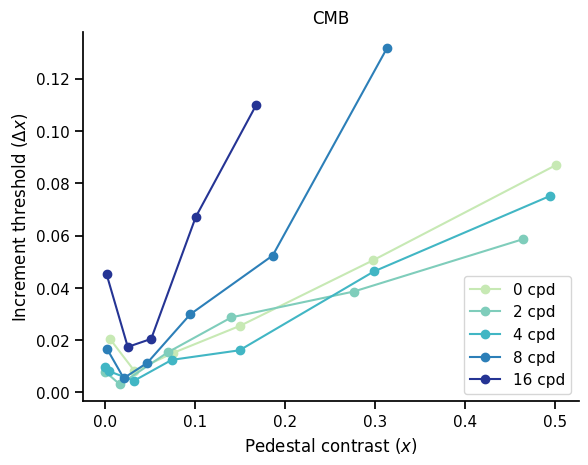

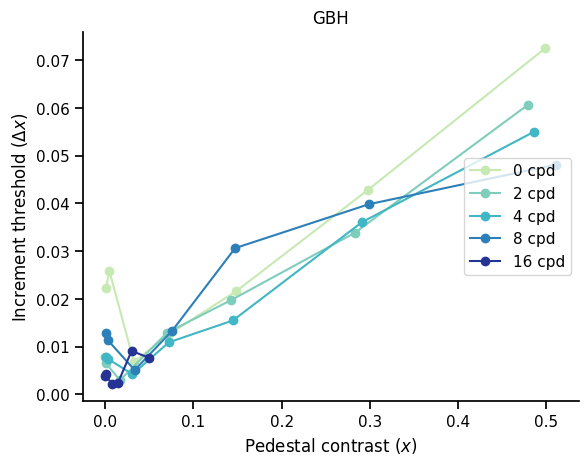

In [328]:
# CMB
plt.plot(cpd_0['x'], cpd_0['Curve1'], 'o-', color="#c7e9b4",label="0 cpd")
plt.plot(cpd_2['x'], cpd_2['Curve1'], 'o-', color="#7fcdbb",label="2 cpd")
plt.plot(cpd_4['x'], cpd_4['Curve1'], 'o-', color="#41b6c4",label="4 cpd")
plt.plot(cpd_8['x'], cpd_8['Curve1'], 'o-', color="#2c7fb8",label="8 cpd")
plt.plot(cpd_16['x'], cpd_16['Curve1'], 'o-', color="#253494",label="16 cpd")
plt.xlabel('Pedestal contrast ($x$)')
plt.ylabel('Increment threshold ($\Delta x$)')
plt.title("CMB")
plt.legend(loc='lower right')
sns.despine()
plt.show()

# GBH
plt.plot(cpd_0_gbh['x'], cpd_0_gbh['Curve1'], 'o-', color="#c7e9b4",label="0 cpd")
plt.plot(cpd_2_gbh['x'], cpd_2_gbh['Curve1'], 'o-', color="#7fcdbb",label="2 cpd")
plt.plot(cpd_4_gbh['x'], cpd_4_gbh['Curve1'], 'o-', color="#41b6c4",label="4 cpd")
plt.plot(cpd_8_gbh['x'], cpd_8_gbh['Curve1'], 'o-', color="#2c7fb8",label="8 cpd")
plt.plot(cpd_16_gbh['x'], cpd_16_gbh['Curve1'], 'o-', color="#253494",label="16 cpd")
plt.xlabel('Pedestal contrast ($x$)')
plt.ylabel('Increment threshold ($\Delta x$)')
plt.title("GBH")
plt.legend(loc='center right', bbox_to_anchor=(1, 0.5))
sns.despine()
plt.show()


#### Deriving scale from discrimination data - Discrimination scaling


In [329]:
def create_discrimination_scale(threshold, data):
    # we first start at the threshold
    # thr = 0.021   threshold for 0 c/deg

    # at threshold the perceptual scales is zero, our starting point
    scale_x = [threshold]
    scale_y = [0]

    continuing = True
    i = 0
    while continuing:
        try:
            c = scale_x[-1]

            if c <= data['x'].max():

                # we now read out the increment threshold at the contrast = c, which was the previous in the list
                delta_x = np.interp(c, data['x'], data['Curve1'])

                scale_x.append(scale_x[-1] + delta_x)
                # 1 is arbitrary, it can be 0.1 or whatever other fixed number
                scale_y.append(scale_y[-1] + 1)
                i += 1
            else:
                continuing = False
        except:
            continuing = False
    #print(i, ' steps were done')

    # convering to numpy arrays
    scale_x = np.array(scale_x)
    scale_y = np.array(scale_y)

    # print(scale_x)
    # print(scale_y)
    return scale_x, scale_y


#### Creating the Scale Data for CMB and GBH

In [330]:
# CMB Scales
scale_x_0, scale_y_0 = create_discrimination_scale(0.021, cpd_0)
scale_x_2, scale_y_2 = create_discrimination_scale(0.008, cpd_2)
scale_x_4, scale_y_4 = create_discrimination_scale(0.0095, cpd_4)
scale_x_8, scale_y_8 = create_discrimination_scale(0.015, cpd_8)
scale_x_16, scale_y_16 = create_discrimination_scale(0.044, cpd_16)

# GBH Scales
scale_x_0_gbh, scale_y_0_gbh = create_discrimination_scale(0.025, cpd_0_gbh)
scale_x_2_gbh, scale_y_2_gbh = create_discrimination_scale(0.008, cpd_2_gbh)
scale_x_4_gbh, scale_y_4_gbh = create_discrimination_scale(0.010, cpd_4_gbh)
scale_x_8_gbh, scale_y_8_gbh = create_discrimination_scale(0.015, cpd_8_gbh)
scale_x_16_gbh, scale_y_16_gbh = create_discrimination_scale(0.048, cpd_16_gbh)




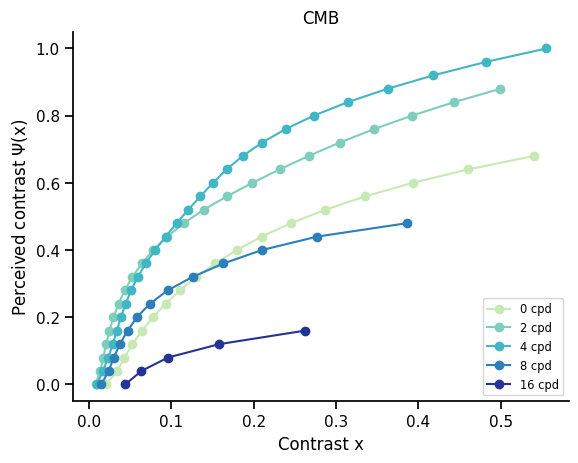

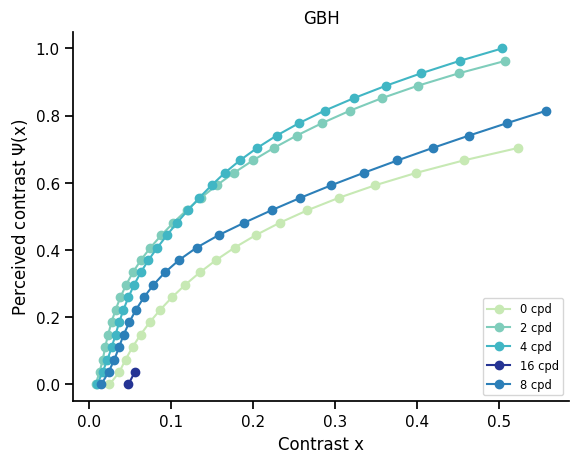

In [331]:
# CMB normalized to maximum steps
plt.plot(scale_x_0, scale_y_0/np.max(scale_y_4), 'o-', color="#c7e9b4", label="0 cpd")
plt.plot(scale_x_2, scale_y_2/np.max(scale_y_4), 'o-', color="#7fcdbb", label="2 cpd")
plt.plot(scale_x_4, scale_y_4/np.max(scale_y_4), 'o-', color="#41b6c4", label="4 cpd")
plt.plot(scale_x_8, scale_y_8/np.max(scale_y_4), 'o-', color="#2c7fb8", label="8 cpd")
plt.plot(scale_x_16, scale_y_16/np.max(scale_y_4), 'o-', color="#253494", label="16 cpd")
plt.title('CMB')
sns.despine()
plt.legend(loc='lower right',fontsize="x-small")
plt.xlabel('Contrast x')
plt.ylabel('Perceived contrast $\Psi$(x)')
plt.show()



# GBH normalized to maximum steps
plt.plot(scale_x_0_gbh, scale_y_0_gbh/np.max(scale_y_4_gbh), 'o-', color="#c7e9b4", label="0 cpd")
plt.plot(scale_x_2_gbh, scale_y_2_gbh/np.max(scale_y_4_gbh), 'o-', color="#7fcdbb", label="2 cpd")
plt.plot(scale_x_4_gbh, scale_y_4_gbh/np.max(scale_y_4_gbh), 'o-', color="#41b6c4", label="4 cpd")
plt.plot(scale_x_16_gbh, scale_y_16_gbh/np.max(scale_y_4_gbh), 'o-', color="#253494", label="16 cpd")
plt.plot(scale_x_8_gbh, scale_y_8_gbh/np.max(scale_y_4_gbh), 'o-', color="#2c7fb8", label="8 cpd")
plt.title('GBH')
plt.xlabel('Contrast x')
plt.ylabel('Perceived contrast $\Psi$(x)')
plt.legend(loc='lower right',fontsize="x-small")
sns.despine()
plt.show()

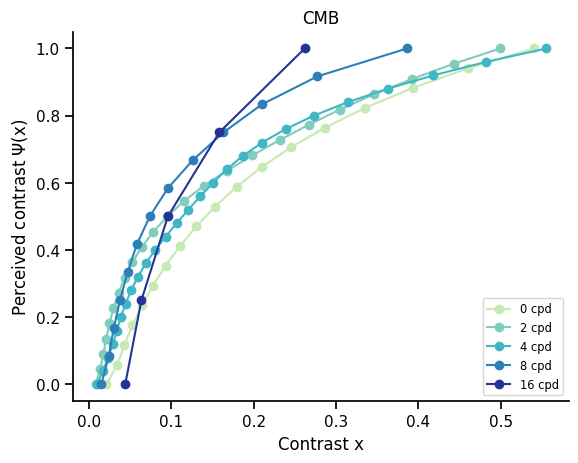

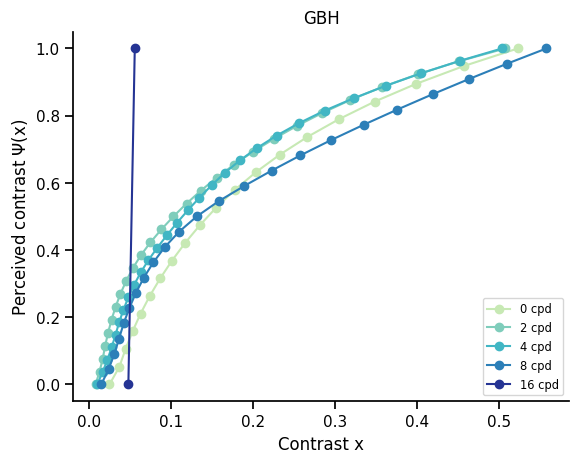

In [332]:
# CMB normalized to each maximum value
plt.plot(scale_x_0, scale_y_0/np.max(scale_y_0), 'o-', color="#c7e9b4", label="0 cpd")
plt.plot(scale_x_2, scale_y_2/np.max(scale_y_2), 'o-', color="#7fcdbb", label="2 cpd")
plt.plot(scale_x_4, scale_y_4/np.max(scale_y_4), 'o-', color="#41b6c4", label="4 cpd")
plt.plot(scale_x_8, scale_y_8/np.max(scale_y_8), 'o-', color="#2c7fb8", label="8 cpd")
plt.plot(scale_x_16, scale_y_16/np.max(scale_y_16), 'o-', color="#253494", label="16 cpd")
plt.title('CMB')
plt.xlabel('Contrast x')
plt.ylabel('Perceived contrast $\Psi$(x)')
sns.despine()
plt.legend(loc='lower right',fontsize="x-small")
plt.show()



# GBH normalized to each maximum value 
plt.plot(scale_x_0_gbh, scale_y_0_gbh/np.max(scale_y_0_gbh), 'o-', color="#c7e9b4", label="0 cpd")
plt.plot(scale_x_2_gbh, scale_y_2_gbh/np.max(scale_y_2_gbh), 'o-', color="#7fcdbb", label="2 cpd")
plt.plot(scale_x_4_gbh, scale_y_4_gbh/np.max(scale_y_4_gbh), 'o-', color="#41b6c4", label="4 cpd")
plt.plot(scale_x_8_gbh, scale_y_8_gbh/np.max(scale_y_8_gbh), 'o-', color="#2c7fb8", label="8 cpd")
plt.plot(scale_x_16_gbh, scale_y_16_gbh/np.max(scale_y_16_gbh), 'o-', color="#253494", label="16 cpd")
plt.title('GBH')
plt.xlabel('Contrast x')
plt.ylabel('Perceived contrast $\Psi$(x)')
plt.legend(loc='lower right',fontsize="x-small")
sns.despine()
plt.show()